Лабораторна робота №2
Студента групи МІТ-31 (Друга підгрупа)
Шило Івана Костянтиновича

Завдання

1. Створити набір даних за допомогою DatasetGenerator

2. Завантажити набір даних для регресії на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)

3. (опціонально для отримання відмінної оцінки) Згенерувати набір даних для регресії на основі звичайних можливостей Python.

4. Для отриманих наборів даних провести встановленні кроки моделювання.

5. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab2.

1.Моделювання для набору даних створеного за домопогою DatasetGenerator

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [15]:
#!pip install -U scikit-learn

In [16]:
import sklearn.datasets
X, y = sklearn.datasets.make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
y

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [17]:
df = pd.DataFrame(X, y)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.665238,-0.371843,-0.756183,-1.573868,1.264944,-2.090836,-1.880143,-0.615140,1.872640,1.194702,1.493816,1.176644,1.752125,0.771434,-2.835226,-0.335090,-1.347500,1.394721,-1.133144,1.946713
0,0.570640,1.291065,-0.002562,0.472153,-0.388163,1.058902,-0.992648,-0.683335,-1.261959,0.356654,-2.051580,1.204204,-0.445670,-0.909857,0.390680,-0.414492,1.310752,-0.183286,1.139470,0.356927
0,0.676660,-2.057757,-2.361714,0.520749,0.731719,0.345325,0.476760,-1.587256,0.825354,-0.141375,1.455771,-1.119217,-1.908396,-1.300520,0.478540,-0.924302,0.487472,0.013792,-1.014874,-0.984165
1,-0.726537,-1.374594,2.042773,-1.884881,0.367398,1.721361,1.489683,0.084049,-1.109847,1.160056,-0.885431,0.433657,1.524037,-0.290824,-0.118913,0.058513,-0.661667,-1.066058,0.620609,1.021546
0,-0.456390,-0.484186,1.236285,1.368222,1.263293,0.552160,-0.779691,-0.196559,-1.085479,-1.301105,-0.460634,0.512264,0.189550,-0.603425,1.139212,-0.086832,-1.775571,-1.113223,-1.088510,-0.438119


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 0
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
 5   5       100 non-null    float64
 6   6       100 non-null    float64
 7   7       100 non-null    float64
 8   8       100 non-null    float64
 9   9       100 non-null    float64
 10  10      100 non-null    float64
 11  11      100 non-null    float64
 12  12      100 non-null    float64
 13  13      100 non-null    float64
 14  14      100 non-null    float64
 15  15      100 non-null    float64
 16  16      100 non-null    float64
 17  17      100 non-null    float64
 18  18      100 non-null    float64
 19  19      100 non-null    float64
dtypes: float64(20)
memory usage: 16.4 KB


In [19]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.014675,-0.077112,0.017718,-0.010984,-0.078090,0.123987,-0.094255,0.011078,-0.208446,0.078220,-0.073585,-0.011668,-0.116193,0.138630,-0.091747,0.004732,0.110859,-0.016383,-0.096843,-0.205280
std,0.993132,0.913602,1.031488,0.945892,1.177164,1.083333,0.891933,1.222638,0.938924,1.096599,0.965674,0.989117,1.017046,1.032936,1.006609,0.703817,1.165908,1.007204,1.045435,1.019695
min,-2.465539,-2.523270,-2.927376,-2.175814,-3.009628,-2.433521,-2.312266,-2.695507,-2.754774,-2.403917,-2.808525,-2.617888,-2.443322,-2.022398,-2.835226,-1.549171,-2.469272,-2.277789,-2.911654,-3.496404
25%,-0.602080,-0.754319,-0.606837,-0.612546,-0.965634,-0.516283,-0.681411,-0.853502,-0.943742,-0.583409,-0.788121,-0.659496,-0.833752,-0.597992,-0.689167,-0.496992,-0.838506,-0.639389,-0.843978,-0.787339
50%,-0.100131,-0.127898,-0.027263,0.019254,-0.184425,0.034182,-0.144306,-0.000524,-0.205599,0.118501,-0.041713,-0.092891,-0.123746,0.089406,-0.086805,0.000023,-0.061251,-0.056995,-0.166384,-0.236999
75%,0.757428,0.545053,0.787501,0.593052,1.264021,0.999001,0.427158,0.698914,0.432170,0.814417,0.524842,0.630367,0.545690,0.790906,0.485641,0.377174,1.043468,0.633802,0.576949,0.475385
max,3.291602,1.906766,2.368795,2.632480,2.112495,2.519440,2.141613,3.144065,2.022519,2.573172,2.111376,1.844375,2.191022,2.751306,2.214401,1.828270,2.328170,2.263279,2.122043,2.075124


<AxesSubplot:>

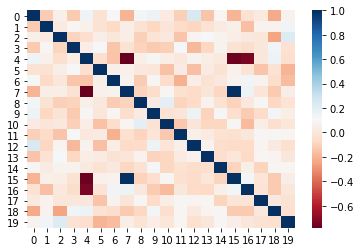

In [20]:
correlation = df.corr()
sns.heatmap(correlation, cmap = "RdBu")

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


In [22]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,y_train)
y_Hat = Lr.predict(X_test)
y_Hat

array([ 0.38607112,  0.06630247,  0.11145989,  0.14649792, -0.3628    ,
        0.62425174,  0.93178213, -0.20630671,  0.85511517,  0.90865864,
        0.57103422, -0.08947974,  0.5971307 ,  0.59425206,  0.70312464,
        0.13407055,  1.11856304,  0.38411691,  0.18411188,  0.82267724,
        0.27584406,  0.50844727,  0.44091039,  0.22468251,  0.62838246,
       -0.13654971,  0.06971097,  1.17861508,  0.53016879, -0.13748806])

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_Hat)

0.3088182656227236

In [24]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_Hat)

0.14234810654508978

In [25]:
result = pd.DataFrame(y_test)
result['predicted'] = y_Hat

result.head()

,0,predicted
0,1,0.386071
1,1,0.066302
2,0,0.111460
3,0,0.146498
4,0,-0.362800


In [26]:
from sklearn.preprocessing import StandardScaler # import the scaler
scaler = StandardScaler() # initiate it
Scaled_X_train = scaler.fit_transform(X_train) #fit the parameters and use it to trannsform the traning data
Scaled_X_test = scaler.transform(X_test) #transform the test data

In [27]:
# Logestic Regression 
from sklearn.linear_model import LogisticRegression # import the classifier
log_model = LogisticRegression() #initiate it
log_model.fit(Scaled_X_train, y_train) #fit the model to the training data

LogisticRegression()

In [28]:
# creating predictions 
y_pred = log_model.predict(Scaled_X_test)

In [29]:
# import evaluation metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [30]:
# create the confusion matrix
confusion_matrix(y_test, y_pred)

array([[14,  1],
       [ 4, 11]], dtype=int64)

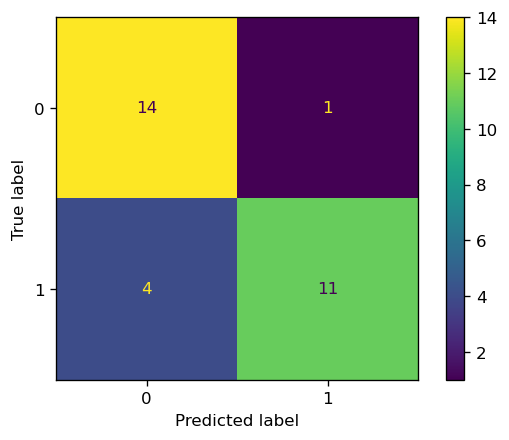

In [31]:
fig, ax = plt.subplots(dpi = 120)
plot_confusion_matrix(log_model, Scaled_X_test, y_test, ax = ax);

In [32]:
# measure the accuracy of our model
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

0.83

In [33]:
# generate the classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.92      0.73      0.81        15

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30

